In [26]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import os
# import random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import glob
import pandas as pd

In [27]:
data_root = "./../../hyperview1/normalized_npy/train/"
imgs_paths = glob.glob(f"{data_root}*.npy")
imgs_paths.sort()
imgs_paths

['./../../hyperview1/normalized_npy/train/00000_patch000.npy',
 './../../hyperview1/normalized_npy/train/00001_patch000.npy',
 './../../hyperview1/normalized_npy/train/00002_patch000.npy',
 './../../hyperview1/normalized_npy/train/00003_patch000.npy',
 './../../hyperview1/normalized_npy/train/00004_patch000.npy',
 './../../hyperview1/normalized_npy/train/00005_patch000.npy',
 './../../hyperview1/normalized_npy/train/00006_patch000.npy',
 './../../hyperview1/normalized_npy/train/00007_patch000.npy',
 './../../hyperview1/normalized_npy/train/00008_patch000.npy',
 './../../hyperview1/normalized_npy/train/00009_patch000.npy',
 './../../hyperview1/normalized_npy/train/00010_patch000.npy',
 './../../hyperview1/normalized_npy/train/00011_patch000.npy',
 './../../hyperview1/normalized_npy/train/00012_patch000.npy',
 './../../hyperview1/normalized_npy/train/00013_patch000.npy',
 './../../hyperview1/normalized_npy/train/00014_patch000.npy',
 './../../hyperview1/normalized_npy/train/00015_patch00

In [28]:
np.mean(np.load(imgs_paths[0]), axis=(1, 2))

array([ 1.299211  ,  1.30192836,  1.30492606,  1.29094278,  1.29300347,
        1.28984242,  1.29128875,  1.29173158,  1.28742972,  1.28943979,
        1.28767326,  1.27691193,  1.25955099,  1.24286311,  1.23661816,
        1.21465843,  1.18786534,  1.15929032,  1.12904171,  1.09097951,
        1.0422993 ,  1.00191629,  0.97721931,  0.9646133 ,  0.95428779,
        0.94299485,  0.93473623,  0.92976787,  0.92015745,  0.91465985,
        0.91701994,  0.92879775,  0.94624545,  0.97226179,  0.99920176,
        1.02084804,  1.04354314,  1.06096949,  1.07044167,  1.07740989,
        1.08239214,  1.0834166 ,  1.08658434,  1.08757605,  1.0867338 ,
        1.09412362,  1.10152593,  1.10250638,  1.10823519,  1.11781692,
        1.12609175,  1.13309828,  1.13605989,  1.13248578,  1.12683583,
        1.12502861,  1.12733661,  1.13739728,  1.15306953,  1.16671569,
        1.17759399,  1.18750138,  1.19565284,  1.21022381,  1.22796898,
        1.23877796,  1.2493562 ,  1.25998531,  1.2654649 ,  1.25

In [29]:
# calculat the mean of each band

mean_bands = []

for path in imgs_paths:
    img = np.load(path)
    mean_bands.append(np.mean(img, axis=(1, 2)))


In [30]:
df = pd.DataFrame(mean_bands)
df.columns = [f'band_{i}' for i in range(df.shape[1])]

In [31]:

train_gt_path = os.path.join( './../train_files_with_gt.csv')
train_gt = pd.read_csv(train_gt_path)

train_gt

,file,base_name,sample_index,P,K,Mg,pH
0,./../hyperview1/pca/train/00000_patch000.npy,0,0,45.1,188.0,179.0,7.2
1,./../hyperview1/pca/train/00001_patch000.npy,1,1,44.8,205.0,188.0,7.0
2,./../hyperview1/pca/train/00002_patch000.npy,2,2,44.4,207.0,145.0,6.8
3,./../hyperview1/pca/train/00003_patch000.npy,3,3,46.5,204.0,143.0,6.8
4,./../hyperview1/pca/train/00004_patch000.npy,4,4,52.0,212.0,167.0,6.7
...,...,...,...,...,...,...,...
89797,./../hyperview1/pca/train/01731_patch127.npy,1731,1731,29.5,146.0,133.0,6.3
89798,./../hyperview1/pca/train/01731_patch128.npy,1731,1731,29.5,146.0,133.0,6.3
89799,./../hyperview1/pca/train/01731_patch129.npy,1731,1731,29.5,146.0,133.0,6.3
89800,./../hyperview1/pca/train/01731_patch130.npy,1731,1731,29.5,146.0,133.0,6.3


In [32]:
# concat df and train_gt by columns
df = pd.concat([df, train_gt], axis=1)

In [33]:
df.head()

,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_147,band_148,band_149,file,base_name,sample_index,P,K,Mg,pH
0,1.299211,1.301928,1.304926,1.290943,1.293003,1.289842,1.291289,1.291732,1.287430,1.289440,...,-0.260588,-0.258654,-0.256520,./../hyperview1/pca/train/00000_patch000.npy,0,0,45.1,188.0,179.0,7.2
1,2.414901,2.388799,2.371303,2.352499,2.317475,2.300599,2.268746,2.232193,2.190451,2.155287,...,0.905014,0.908911,0.913259,./../hyperview1/pca/train/00001_patch000.npy,1,1,44.8,205.0,188.0,7.0
2,0.960345,0.925777,0.920577,0.919199,0.907852,0.901719,0.890107,0.878806,0.865374,0.848101,...,-0.644392,-0.647167,-0.650053,./../hyperview1/pca/train/00002_patch000.npy,2,2,44.4,207.0,145.0,6.8
3,2.827863,2.833809,2.838284,2.838770,2.843459,2.852302,2.853246,2.862296,2.871147,2.882918,...,-0.013059,-0.009816,-0.006464,./../hyperview1/pca/train/00003_patch000.npy,3,3,46.5,204.0,143.0,6.8
4,0.819665,0.794767,0.773812,0.764472,0.750891,0.757655,0.762925,0.765420,0.764097,0.765052,...,-0.335384,-0.336758,-0.338011,./../hyperview1/pca/train/00004_patch000.npy,4,4,52.0,212.0,167.0,6.7


Processing element: P-----------------------------------


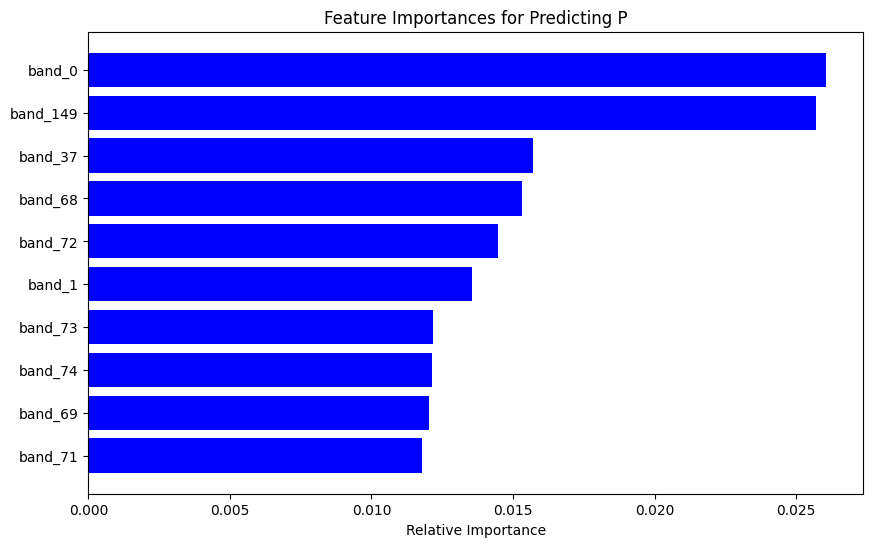

Mean Squared Error: 64.9344385063381
R^2 Score: 0.8983034342495998--------------------------------------------

Processing element: K-----------------------------------


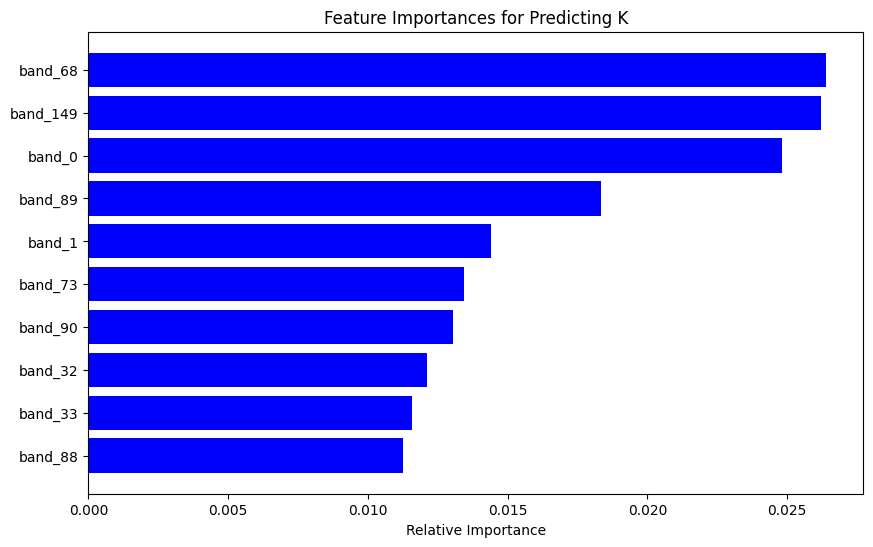

Mean Squared Error: 398.8939091267198
R^2 Score: 0.9044585424918503--------------------------------------------

Processing element: Mg-----------------------------------


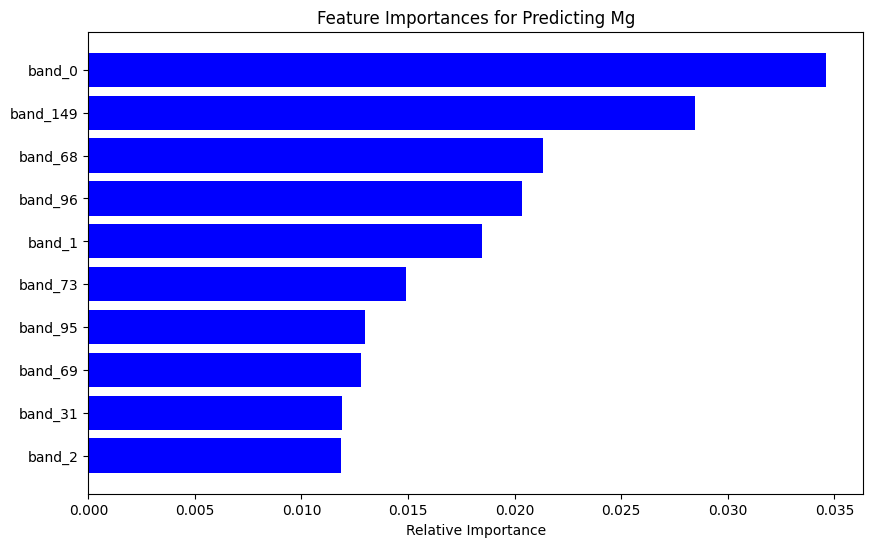

Mean Squared Error: 72.16361013533975
R^2 Score: 0.9130502995240594--------------------------------------------

Processing element: pH-----------------------------------


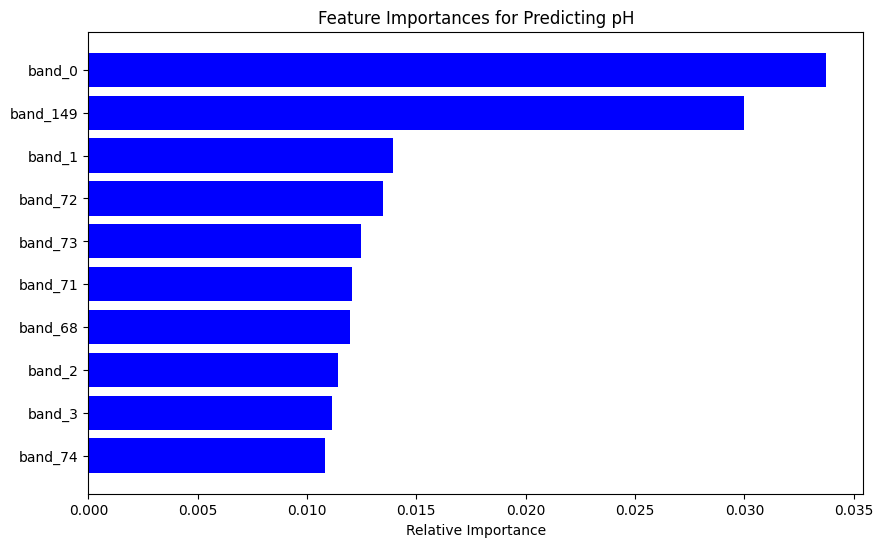

Mean Squared Error: 0.005860128665288388
R^2 Score: 0.8998366139547828--------------------------------------------



In [34]:
elementos = ['P','K','Mg', 'pH']

dados_por_elemento = {}

for elemento in elementos:

    print(f'Processing element: {elemento}-----------------------------------')
    # create a random forest regressor to estimate "B" column
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(df.iloc[:, :150], df[elemento])

    # get the 10 feature importance
    importances = rf.feature_importances_
    indices = np.argsort(importances)[-10:]


    # get top 10 feature importance name
    top_features = df.columns[indices].tolist()
    dados_por_elemento[elemento] = {
        'importances': importances[indices],
        'features': top_features
    }

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for Predicting {elemento}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [f'band_{i}' for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

    # print the mean squared erros
    y_pred = rf.predict(df.iloc[:, :150])
    mse = mean_squared_error(df[elemento], y_pred)
    print(f'Mean Squared Error: {mse}')
    r2_score = rf.score(df.iloc[:, :150], df[elemento])
    print(f'R^2 Score: {r2_score}--------------------------------------------\n')


    dados_por_elemento[elemento]['mse'] = float(mse)
    dados_por_elemento[elemento]['r2_score'] = float(r2_score)
    

In [35]:
# get band numbers from feature names

for elemento in elementos:
    features = dados_por_elemento[elemento]['features']
    band_numbers = [int(f.split('_')[1]) for f in features]
    dados_por_elemento[elemento]['band_numbers'] = band_numbers

In [36]:
for elemento in elementos:
    dados_por_elemento[elemento]['importances'] = dados_por_elemento[elemento]['importances'].tolist()

In [37]:
for elemento in elementos:
    dados_por_elemento[elemento]['band_numbers'] = sorted(dados_por_elemento[elemento]['band_numbers'])

In [38]:
# save as json file
import json
with open('rf_feature_importance.json', 'w') as f:
    json.dump(dados_por_elemento, f, indent=4)
